<a href="https://colab.research.google.com/github/manshacirrus/Object-detection/blob/main/obgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install matplotlib

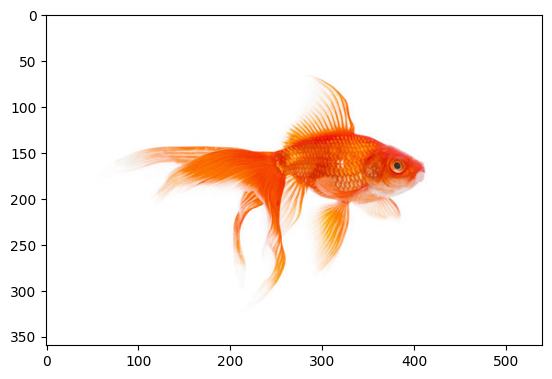

In [22]:
from PIL import Image
InputImg = Image.open("/content/drive/MyDrive/Image classicifation/goldfish.jpg")
import matplotlib.pyplot as plt
plt.imshow(InputImg)

In [23]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [24]:
Transformed_InputImg = transform(InputImg)

In [25]:
print(Transformed_InputImg.shape)

torch.Size([3, 224, 224])


In [26]:
import torch
InputImg_Batched = torch.unsqueeze(Transformed_InputImg, 0)


In [27]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


In [28]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [29]:
resnet = models.resnet101(pretrained = True)
resnet.eval()
output = resnet(InputImg_Batched)

In [30]:
with open('/content/drive/MyDrive/Image classicifation/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]

In [31]:
_, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

1: 'goldfish, Carassius auratus', 99.99172973632812


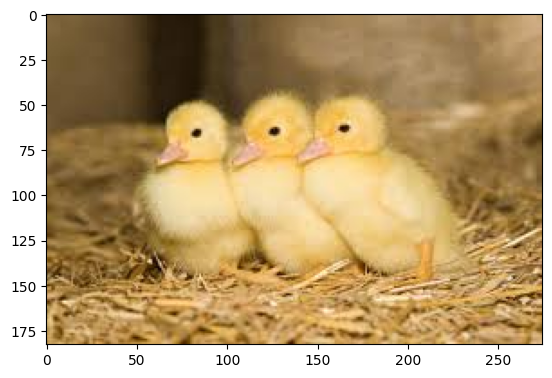

In [32]:
from PIL import Image
# import matplotlib.pyplot as plt

InputImg_ = Image.open("/content/drive/MyDrive/Image classicifation/duck.jpg")

import matplotlib.pyplot as plt
plt.imshow(InputImg_)

In [33]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [34]:
Transformed_InputImg_ = transform(InputImg_)

In [35]:
import torch
InputImg_Batched_ = torch.unsqueeze(Transformed_InputImg_, 0)



In [36]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


In [37]:
from torchvision import models

resnet = models.resnet152(pretrained=True)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
Output_ = resnet(InputImg_Batched_)

In [39]:
with open("/content/drive/MyDrive/Image classicifation/ImageNet1000Classes.txt") as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]


In [42]:
_, predictedLabels = torch.sort(output, descending = True)

Percentage = torch.sigmoid(output)[0] * 100

[(ImageNetClasses[index], Percentage[index].item()) for index in predictedLabels[0][:5]]

[("1: 'goldfish, Carassius auratus',", 100.0),
 ("130: 'flamingo',", 99.95227813720703),
 ("{0: 'tench, Tinca tinca',", 99.92200469970703),
 ("749: 'quill, quill pen',", 99.88712310791016),
 ("392: 'rock beauty, Holocanthus tricolor',", 99.86878204345703)]